In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### `Steps of a semi join`
In the last video, you were shown how to perform a semi join with __pandas__. In this exercise, you'll solidify your understanding of the necessary steps. Recall that a semi join filters the left table to only the rows where a match exists in both the left and right tables.

#### Quest
- Sort the steps in the correct order of the technique shown to perform a semi join in pandas.
![Screenshot 2024-03-20 200529.png](<attachment:Screenshot 2024-03-20 200529.png>)
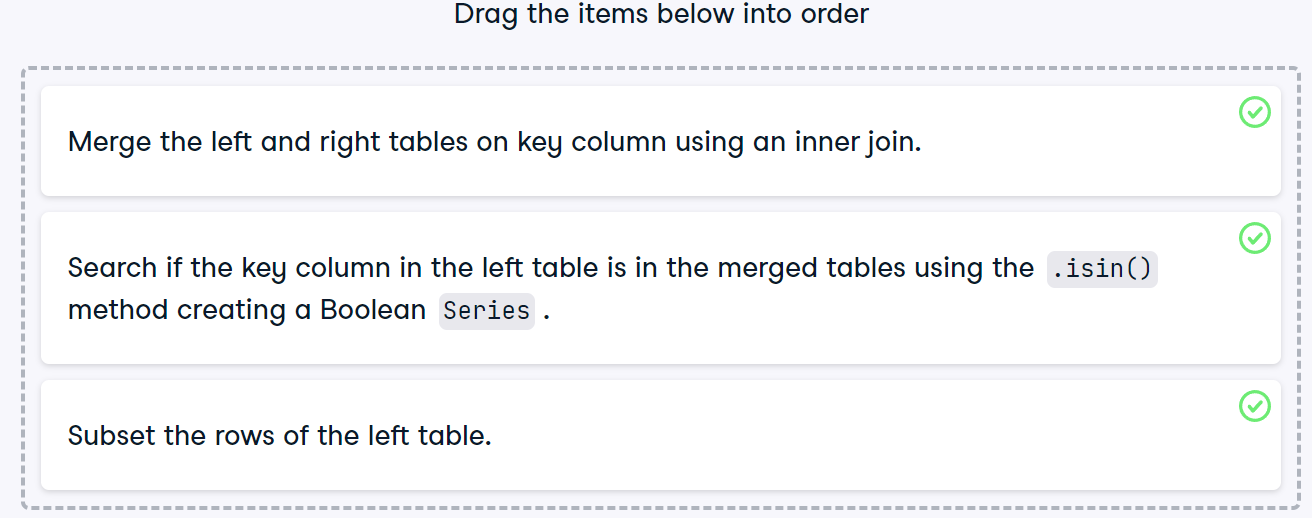

#### `Performing an anti join`
In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The __top_cust__ and __employees__ tables have been provided for you.

In [32]:
employees = pd.read_csv('../../datasets/employees.csv')
employees.head()

,srid,lname,fname,title,hire_date,email
0,0,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,1,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
2,2,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com
3,3,Park,Margaret,Sales Support Agent,2003-05-03,margaret@chinookcorp.com
4,4,Johnson,Steve,Sales Support Agent,2003-10-17,steve@chinookcorp.com


In [33]:
top_cust = pd.read_csv('../../datasets/top_cust.csv')
top_cust.head()

,cid,srid,fname,lname,phone,fax,email
0,1,3,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
1,2,5,Leonie,Köhler,+49 0711 2842222,NaN,leonekohler@surfeu.de
2,3,3,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com
3,4,4,Bjørn,Hansen,+47 22 44 22 22,NaN,bjorn.hansen@yahoo.no
4,5,4,František,Wichterlová,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com


#### Quest 1 CH-3
- Merge __employees__ and __top_cust__ with a __left join__, setting indicator argument to __True__. Save the result to __empl_cust__.

In [34]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                            how='left', indicator=True)
empl_cust.head()

,srid,lname_x,fname_x,title,hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y,_merge
0,0,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,1,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,3,Park,Margaret,Sales Support Agent,2003-05-03,margaret@chinookcorp.com,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
4,3,Park,Margaret,Sales Support Agent,2003-05-03,margaret@chinookcorp.com,3.0,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com,both


- Select the __srid__ column of __empl_cust__ and the rows where ___merge is 'left_only'__. Save the result to __srid_list__.

In [35]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                            how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']
srid_list

0     0
1     1
2     2
62    6
63    7
Name: srid, dtype: int64

- Subset the __employees__ table and select those rows where the __srid__ is in the variable __srid_list__ and print the results.

In [36]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

   srid     lname   fname                title   hire_date  \
0     0     Adams  Andrew      General Manager  2002-08-14   
1     1   Edwards   Nancy        Sales Manager  2002-05-01   
2     2   Peacock    Jane  Sales Support Agent  2002-04-01   
6     6      King  Robert             IT Staff  2004-01-02   
7     7  Callahan   Laura             IT Staff  2004-03-04   

                    email  
0  andrew@chinookcorp.com  
1   nancy@chinookcorp.com  
2    jane@chinookcorp.com  
6  robert@chinookcorp.com  
7   laura@chinookcorp.com  


#### `Performing a semi join`
Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks..

The tables __non_mus_tcks__, __top_invoices__, and __genres__ have been loaded for you.

In [37]:
non_mus_tcks = pd.read_excel('../../datasets/non_mus_tcks.xlsx')
non_mus_tcks.head()

,tid,name,aid,mtid,gid,u_price
0,2820,Occupation / Precipice,227,3,19,1.99
1,2821,"Exodus, Pt. 1",227,3,19,1.99
2,2822,"Exodus, Pt. 2",227,3,19,1.99
3,2823,Collaborators,227,3,19,1.99
4,2824,Torn,227,3,19,1.99


In [38]:
top_invoices = pd.read_excel('../../datasets/top_invoices.xlsx')
top_invoices.head()

,ilid,iid,tid,uprice,quantity
0,470,88,2832,1.99,1
1,473,88,2850,1.99,1
2,476,88,2868,1.99,1
3,527,96,3214,1.99,1
4,528,96,3223,1.99,1


In [39]:
genres = pd.read_excel('../../datasets/genres.xlsx')
genres.head()

,gid,name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


#### Quest 2 CH-3
- Merge __non_mus_tcks__ and __top_invoices__ on __tid__ using an __inner join__. Save the result as __tracks_invoices__.
- Use __.isin()__ to subset the rows of __non_mus_tck__ where __tid__ is in the __tid__ column of __tracks_invoices__. Save the result as __top_tracks__.
- Group __top_tracks__ by __gid__ and count the __tid__ rows. Save the result to __cnt_by_gid__.
- Merge __cnt_by_gid__ with the __genres__ table on __gid__ and print the result.

In [40]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid', how='inner')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid': 'count'})

# Merge the genres table to cnt_by_gid on gid and print
result = cnt_by_gid.merge(genres, on='gid')
print(result)

   gid  tid                name
0   19    4            TV Shows
1   21    2               Drama
2   22    1              Comedy


#### `Concatenation basics`
You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. Try various features of the __.concat()__ method by concatenating the tables vertically together in different ways.

The tables __tracks_master__, __tracks_ride__, and __tracks_st__ have loaded for you.

In [41]:
tracks_master = pd.read_csv('../../datasets/tracks_master.csv')
tracks_master.head()

,tid,name,aid,mtid,gid,composer,u_price
0,1853,Battery,152,1,3,J.Hetfield/L.Ulrich,0.99
1,1854,Master Of Puppets,152,1,3,K.Hammett,0.99
2,1857,Disposable Heroes,152,1,3,J.Hetfield/L.Ulrich,0.99


In [42]:
tracks_ride = pd.read_csv('../../datasets/tracks_ride.csv')
tracks_ride.head()

,tid,name,aid,mtid,gid,u_price
0,1874,Fight Fire With Fire,154,1,3,0.99
1,1875,Ride The Lightning,154,1,3,0.99
2,1876,For Whom The Bell Tolls,154,1,3,0.99
3,1877,Fade To Black,154,1,3,0.99
4,1878,Trapped Under Ice,154,1,3,0.99


In [43]:
tracks_st = pd.read_csv('../../datasets/tracks_st.csv')
tracks_st

,tid,name,aid,mtid,gid,u_price
0,1882,Frantic,155,1,3,0.99
1,1883,St. Anger,155,1,3,0.99
2,1884,Some Kind Of Monster,155,1,3,0.99
3,1885,Dirty Window,155,1,3,0.99
4,1886,Invisible Kid,155,1,3,0.99


#### Quest 3 CH-3
- Concatenate __tracks_master__, __tracks_ride__, and __tracks_st__, in that order, setting __sort__ to __True__.
- Concatenate __tracks_master__, __tracks_ride__, and __tracks_st__, where the index goes from 0 to n-1.
- Concatenate __tracks_master__, __tracks_ride__, and __tracks_st__, showing only columns that are in all tables.

In [44]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)
print(tracks_from_albums)

   aid             composer  gid  mtid                     name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
1  152            K.Hammett    3     1        Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
0  154                  NaN    3     1     Fight Fire With Fire  1874     0.99
1  154                  NaN    3     1       Ride The Lightning  1875     0.99
2  154                  NaN    3     1  For Whom The Bell Tolls  1876     0.99
3  154                  NaN    3     1            Fade To Black  1877     0.99
4  154                  NaN    3     1        Trapped Under Ice  1878     0.99
0  155                  NaN    3     1                  Frantic  1882     0.99
1  155                  NaN    3     1                St. Anger  1883     0.99
2  155                  NaN    3     1     Some Kind Of Monster  1884     0.99
3  155                  NaN    3     1             D

In [45]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], ignore_index=True, sort=True)
print(tracks_from_albums)

    aid             composer  gid  mtid                     name   tid  \
0   152  J.Hetfield/L.Ulrich    3     1                  Battery  1853   
1   152            K.Hammett    3     1        Master Of Puppets  1854   
2   152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857   
3   154                  NaN    3     1     Fight Fire With Fire  1874   
4   154                  NaN    3     1       Ride The Lightning  1875   
5   154                  NaN    3     1  For Whom The Bell Tolls  1876   
6   154                  NaN    3     1            Fade To Black  1877   
7   154                  NaN    3     1        Trapped Under Ice  1878   
8   155                  NaN    3     1                  Frantic  1882   
9   155                  NaN    3     1                St. Anger  1883   
10  155                  NaN    3     1     Some Kind Of Monster  1884   
11  155                  NaN    3     1             Dirty Window  1885   
12  155                  NaN    3     

In [46]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], join='inner', sort=True)
print(tracks_from_albums)

   aid  gid  mtid                     name   tid  u_price
0  152    3     1                  Battery  1853     0.99
1  152    3     1        Master Of Puppets  1854     0.99
2  152    3     1        Disposable Heroes  1857     0.99
0  154    3     1     Fight Fire With Fire  1874     0.99
1  154    3     1       Ride The Lightning  1875     0.99
2  154    3     1  For Whom The Bell Tolls  1876     0.99
3  154    3     1            Fade To Black  1877     0.99
4  154    3     1        Trapped Under Ice  1878     0.99
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.99


#### `Concatenating with keys`
The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named __inv_jul__, __inv_aug__, and __inv_sep__. Concatenate these tables into one to create a graph of the average monthly invoice total.

In [47]:
inv_jul = pd.read_csv('../../datasets/inv_jul.csv')
inv_jul.head()

,iid,cid,invoice_date,total,bill_ctry
0,42,51,2009-07-06,1.98,Sweden
1,43,53,2009-07-06,1.98,UK
2,44,55,2009-07-07,3.96,Australia
3,45,59,2009-07-08,5.94,India
4,46,6,2009-07-11,8.91,Czech Republic


In [48]:
inv_aug = pd.read_csv('../../datasets/inv_aug.csv')
inv_aug.head()

,iid,cid,invoice_date,total,bill_ctry
0,49,30,2009-08-06,1.98,Canada
1,50,32,2009-08-06,1.98,Canada
2,51,34,2009-08-07,3.96,Portugal
3,52,38,2009-08-08,5.94,Germany
4,53,44,2009-08-11,8.91,Finland


In [49]:
inv_sep = pd.read_csv('../../datasets/inv_sep.csv')
inv_sep.head()

,iid,cid,invoice_date,total,bill_ctry
0,56,9,2009-09-06,1.98,Denmark
1,57,11,2009-09-06,1.98,Brazil
2,58,13,2009-09-07,3.96,Brazil
3,59,17,2009-09-08,5.94,USA
4,60,23,2009-09-11,8.91,USA


#### Quest 4 CH-3
- Concatenate the three tables together vertically in order with the oldest month first, adding __'7Jul'__, __'8Aug'__, and __'9Sep'__ as keys for their respective months, and save to variable __avg_inv_by_month__.
- Use the __.agg()__ method to find the average of the total column from the grouped invoices.
- Create a bar chart of __avg_inv_by_month__.

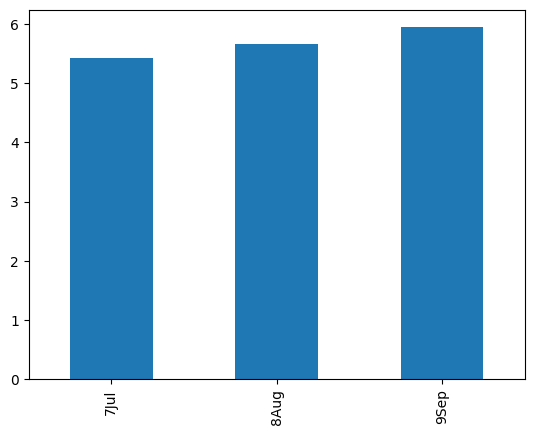

In [50]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], keys=['7Jul', '8Aug', '9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0)['total'].agg('mean')

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()


## less precise

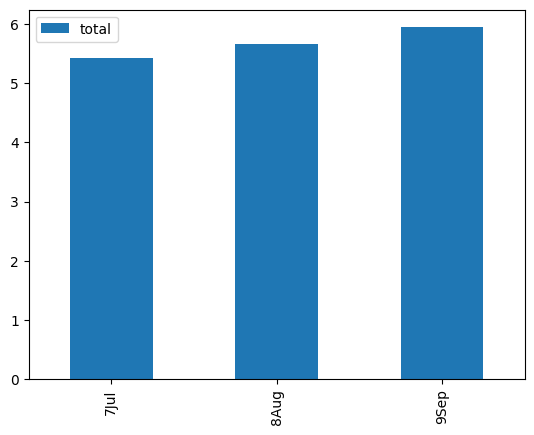

In [51]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], keys=['7Jul', '8Aug', '9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total': 'mean'})

# Create a bar chart of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()


#### `Validating a merge`
You have been given 2 tables, __artists__, and __albums__. Use the IPython shell to merge them using __artists.merge(albums, on='artid').head()__. Adjust the __validate__ argument to answer which statement is ___False___.

In [52]:
artists = pd.read_excel('../../datasets/artists.xlsx')
artists.head()

,name,artid
0,...,1
1,...,2
2,...,3
3,...,4
4,...,5


In [53]:
albums = pd.read_excel('../../datasets/albums.xlsx')
albums.head()

,aid,title,artid
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the ...,2
2,3,Restless and ...,2
3,4,Let There Be ...,1
4,5,Big ...,3


#### Quest 5 CH-3
#### `Possible answers`

- You can use '__many_to_many__' without an error, since there is a duplicate key in one of the tables.

- You can use '__one_to_many__' without error, since there is a duplicate key in the right table.

- `You can use '__many_to_one__' without an error, since there is a duplicate key in the left table.` This statement is false. There is a duplicate value in the artid column in the albums table, which is the right table in this merge. Therefore, setting validate equal to 'many_to_one' or 'one_to_one' will raise an error, making this statement false

In [54]:
artists.merge(albums, on='artid', validate='many_to_many').head()

,name,artid,aid,title
0,...,1,1,For Those About To Rock We Salute You
1,...,1,4,Let There Be ...
2,...,2,2,Balls to the ...
3,...,2,3,Restless and ...
4,...,3,5,Big ...


In [55]:
artists.merge(albums, on='artid', validate='one_to_many').head()

,name,artid,aid,title
0,...,1,1,For Those About To Rock We Salute You
1,...,1,4,Let There Be ...
2,...,2,2,Balls to the ...
3,...,2,3,Restless and ...
4,...,3,5,Big ...


In [56]:
# artists.merge(albums, on='artid', validate='many_to_one').head()

#### `Concatenate and merge to find common songs`
The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi join to return only the most popular classical music tracks.

The tables __classic_18__, __classic_19__, and __pop_18__, __pop_19__ have been loaded for you. Additionally, __pandas__ has been loaded as pd.

In [57]:
classic_18 = pd.read_csv('../../datasets/classic_18.csv')
classic_18.head()

,pid,tid
0,12,3483
1,12,3416
2,12,3489
3,12,3479
4,12,3440


In [58]:
classic_19 = pd.read_csv('../../datasets/classic_19.csv')
classic_19.head()

,pid,tid
0,12,3482
1,12,3434
2,12,3448
3,12,3499
4,12,3425


In [59]:
pop_18 = pd.read_excel('../../datasets/pop_18.xlsx')
pop_18.head()

,pid,tid
0,1,3063
1,1,2712
2,1,2641
3,1,2271
4,1,919


In [62]:
pop_19 = pd.read_excel('../../datasets/pop_19.xlsx')
pop_19.head()

,pid,tid
0,1,2115
1,1,297
2,1,272
3,1,3023
4,1,1193


#### Quest 6 CH-3
- Concatenate the __classic_18__ and __classic_19__ tables vertically where the index goes from 0 to n-1, and save to __classic_18_19__.
- Concatenate the __pop_18__ and __pop_19__ tables vertically where the index goes from 0 to n-1, and save to __pop_18_19__

In [65]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)
# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18,pop_19], ignore_index=True)


In [64]:
classic_18_19.head()


,pid,tid
0,12,3483
1,12,3416
2,12,3489
3,12,3479
4,12,3440


In [63]:
pop_18_19.head()

,pid,tid
0,1,3063
1,1,2712
2,1,2641
3,1,2271
4,1,919


#### Quest 7-CH3
- With __classic_18_19__ on the __left__, merge it with __pop_18_19__ on tid using an __inner join__.
- Use __.isin()__ to filter __classic_18_19__ where tid is in __classic_pop__.

In [66]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on='tid', how='inner')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print(popular_classic)

    pid   tid
3    12  3479
10   12  3439
21   12  3445
23   12  3449
48   12  3437
50   12  3435
